In [73]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

In [74]:
from collections import Counter

In [75]:
folder="dataset_v5/v5_2/"

In [76]:
%matplotlib inline

In [77]:
#os.stat(folder+"final_shodhganga_dataset_v5.csv").st_size

In [78]:
mod_ment2 = pd.read_csv(folder+"final_shodhganga_dataset_v5_1.csv", sep =",")

In [79]:
#mod_ment2.drop_duplicates(subset=['advId','resId','DepartmentId','instituteId','N_thesisId'], keep="first", inplace=True)

In [80]:
#mod_ment2.drop_duplicates(subset=['advisorId', 'researcherId'], keep='first', inplace=True)

In [81]:
mod_ment2.columns

Index(['advisorId', 'researcherId', 'advId', 'resId', 'advisor_name',
       'researcher_name', 'publisher_dept', 'DepartmentId',
       'publisher_institution', 'instituteId', 'title', 'thesisId',
       'N_thesisId', 'date_submitted', 'dc.date.awarded', 'dc.subject.ddc',
       'uniq_ddc_across_dept', 'dc.description.abstract',
       'dc.title.alternative', 'N_DepartmentId_1'],
      dtype='object')

In [82]:
graph = nx.convert_matrix.from_pandas_edgelist(mod_ment2, 'advisorId','researcherId', create_using=nx.DiGraph())

In [83]:
len(graph.nodes())

280119

In [125]:
graph1 = nx.convert_matrix.from_pandas_edgelist(mod_ment2, 'advId','resId','N_thesisId', create_using=nx.DiGraph())

In [126]:
len(graph1.nodes())

259655

In [127]:
components = list(nx.weakly_connected_components(graph))

In [128]:
components1 = list(nx.weakly_connected_components(graph1))

In [129]:
components.sort(key=len, reverse=True)

In [130]:
components1.sort(key=len, reverse=True)

In [131]:
len(components)

79995

In [132]:
len(components[0])

935

In [133]:
len(components1)

59676

In [134]:
len(components1[0])

632

In [135]:
comp_len=[len(c) for c in components1]

In [136]:
comp_size_dist=Counter(comp_len)

In [137]:
comp_size_dist

Counter({632: 1,
         379: 1,
         360: 1,
         324: 1,
         310: 1,
         276: 1,
         273: 1,
         265: 1,
         251: 1,
         246: 1,
         239: 1,
         233: 1,
         227: 1,
         223: 1,
         203: 2,
         199: 1,
         192: 1,
         184: 1,
         183: 1,
         182: 2,
         177: 1,
         176: 2,
         172: 1,
         169: 1,
         168: 1,
         167: 1,
         161: 2,
         158: 2,
         153: 1,
         150: 1,
         148: 1,
         144: 1,
         143: 1,
         140: 1,
         138: 1,
         135: 1,
         134: 1,
         132: 3,
         131: 1,
         130: 1,
         129: 1,
         128: 1,
         126: 4,
         124: 1,
         123: 2,
         122: 2,
         118: 1,
         117: 2,
         116: 2,
         115: 1,
         112: 3,
         111: 2,
         110: 1,
         109: 1,
         108: 1,
         107: 1,
         106: 1,
         103: 2,
         102: 

In [138]:
in_dgr = graph1.in_degree()

In [139]:
in_dgr = dict(in_dgr)

In [140]:
sorted_in_dgr = dict(sorted(in_dgr.items(), key=lambda item: item[1],reverse=True))

In [141]:
sorted_in_dgr

{97751: 6,
 97678: 4,
 97781: 4,
 97827: 4,
 97753: 4,
 98522: 4,
 98504: 4,
 101115: 4,
 101133: 4,
 103862: 4,
 119746: 4,
 129872: 4,
 27402: 4,
 232034: 4,
 156726: 4,
 179922: 4,
 213379: 4,
 213389: 4,
 94767: 3,
 94950: 3,
 96872: 3,
 97507: 3,
 97509: 3,
 97513: 3,
 97662: 3,
 97758: 3,
 97665: 3,
 97757: 3,
 97761: 3,
 97809: 3,
 97709: 3,
 97762: 3,
 97692: 3,
 97892: 3,
 97896: 3,
 98019: 3,
 97689: 3,
 97706: 3,
 97752: 3,
 98512: 3,
 98513: 3,
 98501: 3,
 98534: 3,
 101117: 3,
 101120: 3,
 104971: 3,
 105877: 3,
 106835: 3,
 106834: 3,
 282038: 3,
 107803: 3,
 108259: 3,
 108693: 3,
 114803: 3,
 117552: 3,
 117629: 3,
 118926: 3,
 118928: 3,
 200223: 3,
 119730: 3,
 12892: 3,
 119724: 3,
 119769: 3,
 119744: 3,
 120069: 3,
 120055: 3,
 123139: 3,
 127338: 3,
 127590: 3,
 127598: 3,
 127643: 3,
 127796: 3,
 128591: 3,
 186838: 3,
 129494: 3,
 129497: 3,
 156705: 3,
 241959: 3,
 129501: 3,
 129502: 3,
 129511: 3,
 129512: 3,
 129514: 3,
 129513: 3,
 213409: 3,
 17974: 3,
 13

In [142]:
in_dgr_val = in_dgr.values()

In [143]:
in_dgr_dist = Counter(in_dgr_val)

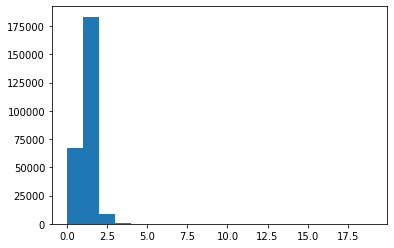

In [144]:
plt.hist(in_dgr_val, bins=np.arange(0,20,1))
plt.show()

In [145]:
in_dgr_dist #indgree, no.nodes

Counter({1: 183259, 0: 67395, 2: 8706, 3: 277, 4: 17, 6: 1})

In [146]:
in_dgr_dist

Counter({1: 183259, 0: 67395, 2: 8706, 3: 277, 4: 17, 6: 1})

In [147]:
#list(sorted_fecundity.keys())[-5:]

In [148]:
#ment[ment['advId_1']==75844]

In [149]:
out_dgr = graph1.out_degree()

In [150]:
out_dgr = dict(out_dgr)

In [151]:
sorted_out_dgr = dict(sorted(out_dgr.items(), key=lambda item: item[1],reverse=True))

In [152]:
sorted_out_dgr

{144109: 128,
 88147: 66,
 30812: 61,
 88166: 60,
 26894: 58,
 2013: 55,
 48103: 55,
 79607: 52,
 89320: 51,
 65544: 50,
 153: 48,
 82909: 48,
 21670: 47,
 83523: 47,
 67666: 46,
 53252: 44,
 1556: 43,
 2952: 43,
 58479: 43,
 65407: 43,
 81720: 43,
 4746: 42,
 15429: 42,
 104127: 41,
 30646: 41,
 53108: 41,
 63216: 41,
 65515: 41,
 90436: 41,
 4271: 40,
 28440: 40,
 72163: 39,
 79608: 39,
 81731: 39,
 45604: 38,
 67153: 38,
 85848: 38,
 2127: 37,
 22427: 37,
 52342: 37,
 68259: 37,
 235357: 36,
 36120: 36,
 45605: 36,
 72156: 36,
 11107: 35,
 21692: 35,
 41813: 35,
 58476: 35,
 71911: 35,
 88788: 35,
 17923: 34,
 4744: 34,
 6974: 34,
 26589: 34,
 45451: 34,
 46617: 34,
 51360: 34,
 53615: 34,
 81724: 34,
 83320: 34,
 4752: 33,
 30321: 33,
 34141: 33,
 37176: 33,
 37397: 33,
 45595: 33,
 65455: 33,
 68266: 33,
 69133: 33,
 76069: 33,
 81443: 33,
 88337: 33,
 88539: 33,
 92802: 33,
 852: 32,
 4742: 32,
 6274: 32,
 12387: 32,
 17155: 32,
 21545: 32,
 22565: 32,
 24275: 32,
 34197: 32,
 65

In [153]:
out_dgr_val = out_dgr.values()

In [154]:
out_dgr_dist = Counter(out_dgr_val)

In [155]:
deg, cnt = zip(*out_dgr_dist.items())

In [156]:
out_dgr_dist #out Degree, Number of node

Counter({2: 12480,
         15: 205,
         0: 183367,
         1: 42346,
         5: 2635,
         3: 6615,
         8: 1047,
         6: 1909,
         10: 601,
         4: 3879,
         7: 1340,
         11: 459,
         9: 751,
         25: 30,
         14: 270,
         12: 396,
         21: 77,
         34: 10,
         48: 2,
         27: 33,
         23: 55,
         31: 16,
         13: 297,
         24: 25,
         18: 109,
         20: 80,
         36: 4,
         28: 22,
         32: 13,
         17: 133,
         41: 6,
         19: 98,
         26: 36,
         43: 5,
         22: 54,
         55: 2,
         37: 4,
         29: 20,
         16: 167,
         40: 2,
         42: 2,
         33: 14,
         30: 15,
         35: 6,
         47: 2,
         128: 1,
         58: 1,
         61: 1,
         38: 3,
         44: 1,
         50: 1,
         46: 1,
         39: 3,
         52: 1,
         66: 1,
         60: 1,
         51: 1})

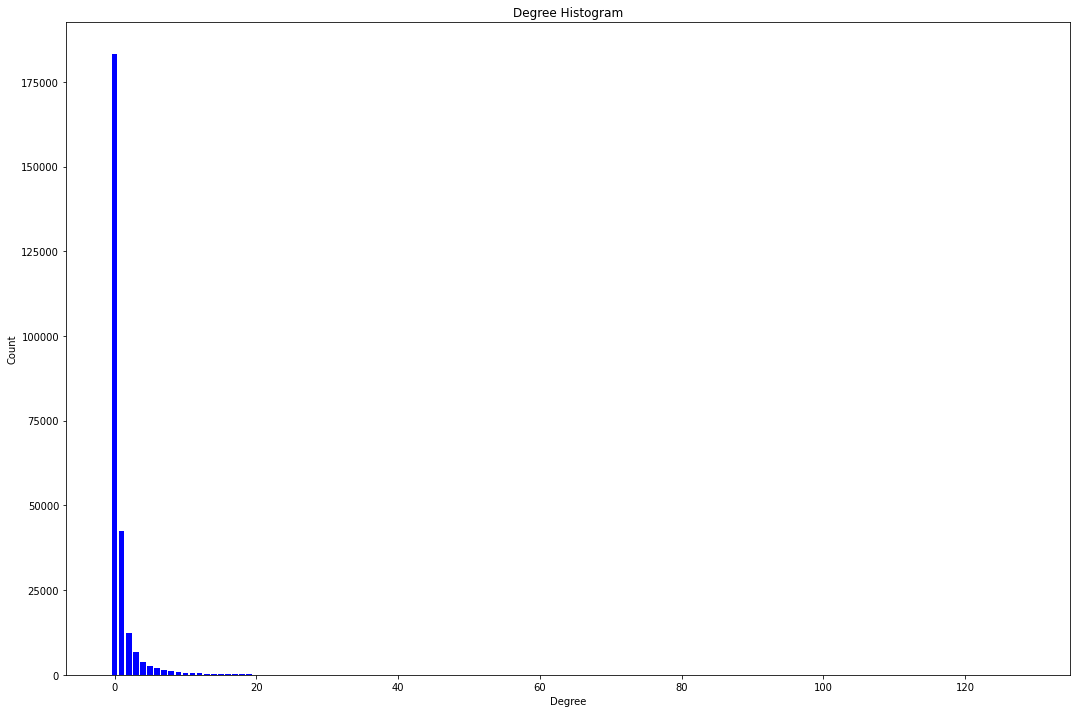

In [116]:
fig, ax = plt.subplots(figsize=(18,12))
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d for d in deg])
#ax.set_xticklabels(deg)
plt.show()

<h2>ANCESTORS, DESCENDANTS</h2>

In [157]:
len(nx.descendants(graph1,68388.0)) 

1

In [158]:
len(nx.ancestors(graph1,68388.0))

0

In [159]:
mod_ment2.columns   

Index(['advisorId', 'researcherId', 'advId', 'resId', 'advisor_name',
       'researcher_name', 'publisher_dept', 'DepartmentId',
       'publisher_institution', 'instituteId', 'title', 'thesisId',
       'N_thesisId', 'date_submitted', 'dc.date.awarded', 'dc.subject.ddc',
       'uniq_ddc_across_dept', 'dc.description.abstract',
       'dc.title.alternative', 'N_DepartmentId_1'],
      dtype='object')

In [160]:
#pd.unique(mod_ment2[(mod_ment2["advId"]==144203.0)]['researcher_name'])#,"title"]].values#.value_counts()#['dc.date.submitted[]'])#

In [161]:
27402,103862

(27402, 103862)

In [162]:
sorted_in_dgr

{97751: 6,
 97678: 4,
 97781: 4,
 97827: 4,
 97753: 4,
 98522: 4,
 98504: 4,
 101115: 4,
 101133: 4,
 103862: 4,
 119746: 4,
 129872: 4,
 27402: 4,
 232034: 4,
 156726: 4,
 179922: 4,
 213379: 4,
 213389: 4,
 94767: 3,
 94950: 3,
 96872: 3,
 97507: 3,
 97509: 3,
 97513: 3,
 97662: 3,
 97758: 3,
 97665: 3,
 97757: 3,
 97761: 3,
 97809: 3,
 97709: 3,
 97762: 3,
 97692: 3,
 97892: 3,
 97896: 3,
 98019: 3,
 97689: 3,
 97706: 3,
 97752: 3,
 98512: 3,
 98513: 3,
 98501: 3,
 98534: 3,
 101117: 3,
 101120: 3,
 104971: 3,
 105877: 3,
 106835: 3,
 106834: 3,
 282038: 3,
 107803: 3,
 108259: 3,
 108693: 3,
 114803: 3,
 117552: 3,
 117629: 3,
 118926: 3,
 118928: 3,
 200223: 3,
 119730: 3,
 12892: 3,
 119724: 3,
 119769: 3,
 119744: 3,
 120069: 3,
 120055: 3,
 123139: 3,
 127338: 3,
 127590: 3,
 127598: 3,
 127643: 3,
 127796: 3,
 128591: 3,
 186838: 3,
 129494: 3,
 129497: 3,
 156705: 3,
 241959: 3,
 129501: 3,
 129502: 3,
 129511: 3,
 129512: 3,
 129514: 3,
 129513: 3,
 213409: 3,
 17974: 3,
 13

In [168]:
mod_ment2[(mod_ment2["resId"]==103862.0)][['advisor_name','researcher_name','title','resId',"advId","N_thesisId",'date_submitted','DepartmentId','instituteId','dc.date.awarded']].values

array([['Kesambi, D. D.', 'Mohammad, Shabbar',
        'On the study of the lorentz invariant spaces_2nd thesis',
        103862, 4912, 'T141160', '1943-01-01', 'D563', 'I292', nan],
       ['Kesambi, D. D.', 'Mohammad, Shabbar',
        'On the S_operator associated with the lie group of transformations_1st thesis',
        103862, 4912, 'T183152', '1943-01-01', 'D563', 'I292', nan],
       ['Siddiqi, M. R.', 'Mohammad, Shabbar',
        'On the study of the lorentz invariant spaces_2nd thesis',
        103862, 4913, 'T141160', '1943-01-01', 'D563', 'I292', nan],
       ['Siddiqi, M. R.', 'Mohammad, Shabbar',
        'On the S_operator associated with the lie group of transformations_1st thesis',
        103862, 4913, 'T183152', '1943-01-01', 'D563', 'I292', nan],
       ['Siddiqi, M. R.', 'Shabbar, Mohammad',
        'On the geometry of the spaces of Riemann constructed by representing hyperquadrics as points',
        103862, 4913, 'T18646', '1943-01-01', 'D563', 'I292', nan],
     

In [8]:
mod_ment2.columns

Index(['advisorId', 'researcherId', 'advId', 'resId', 'advisor_name',
       'researcher_name', 'publisher_dept', 'DepartmentId',
       'publisher_institution', 'instituteId', 'dc.title[]', 'thesisId',
       'N_thesisId', 'dc.date.submitted[]', 'dc.date.awarded',
       'dc.subject.ddc', 'dc.description.abstract', 'dc.title.alternative'],
      dtype='object')

In [76]:
mod_ment2[mod_ment2['researcher_name'].str.lower().str.contains("ragunathan")]

,advisorId,researcherId,advId,resId,advisor_name,researcher_name,publisher_dept,DepartmentId,publisher_institution,instituteId,title,thesisId,N_thesisId,date_submitted,dc.date.awarded,dc.subject.ddc,uniq_ddc_across_dept,dc.description.abstract,dc.title.alternative
1309,521,94879,235456,94879,Rakesh Kumar Jat,Ragunathan M,faculty of pharmacy,D1373,Shri Jagdishprasad Jhabarmal Tibarewala Univer...,I17,ETHNOMEDICINAL SURVEY OF TRADITIONAL MEDICINAL...,T98000,T91408,2017-07-09,19-11-2017,600::Technology|610::Medicine & health|615::Ph...,"('600', '610', '615')",NaN,NaN
1413,570,94860,591,94879,Smohan,RAGUNATHAN M,faculty of pharmacy,D1373,Shri Jagdishprasad Jhabarmal Tibarewala Univer...,I17,THNOMEDICINAL SURVEY OF TRADITIONAL MEDICINAL ...,T91408,T91408,2017-07-09,19-11-2017,600::Technology|610::Medicine & health|615::Ph...,"('600', '610', '615')",NaN,NaN
1435,585,94879,585,94879,"Yadav, S. K.",Ragunathan M,faculty of pharmacy,D1373,Shri Jagdishprasad Jhabarmal Tibarewala Univer...,I17,ETHNOMEDICINAL SURVEY OF TRADITIONAL MEDICINAL...,T82551,T91408,2017-07-09,19-11-2017,600::Technology|610::Medicine & health|615::Ph...,"('600', '610', '615')",NaN,NaN
38742,17220,128229,17220,128229,"Sahadevan, P.","Ragunathan, K.",school of international studies,D991,Jawaharlal Nehru University,I85,Pitoportional representation system in Sri Lan...,T40369,T40369,2004-01-01,NaN,300::Social sciences|370::Education,"('300', '370')",NaN,NaN
106780,50066,191449,50066,191449,"Sulochana, N.","Ragunathan, V.",department of chemistry,D753,Bharathidasan University,I103,Phytochemical studies on Indian medicinal plan...,T141706,T141706,1992-01-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN
111153,51699,51692,51699,51692,"Swaminathan, K.","Ragunathan, R.",department of biotechnology,D988,Bharathiar University,I253,Biotechnological applications of pleurotus SPP...,T85911,T85911,2004-12-31,NaN,600::Technology|660::Chemical engineering,"('600', '660')",NaN,NaN
115976,53471,199659,53471,199659,"Lokanadha Reddy, G.","Ragunathan, M.",department of education,D1963,Alagappa University,I333,Awareness_attitude and competencies required b...,T70699,T70699,2005-01-01,NaN,300::Social sciences|370::Education,"('300', '370')",NaN,NaN
